# Artificial Neural Network - Initialization of the Weights

In this notebook we discuss weight initialization techniques for:
- Artificial Neural Network (ANN) in general
- Deep Artificial Neural Network (DNN) 


The Artificial Neural Network (ANN) loss function is **non-convex**. The location of the global minimum or "near-global minimum" of the loss function is found by using the Gradient Descent (stochastic or mini-batch) algorithm that learns the optimal weights of an ANN.

In ANN, there exists weights between every two layers. The linear transformation of these weights and the values in the previous layers passes through a non-linear activation function (e.g., logistic sigmoid, tanh, ReLU) to produce the values of the next layer. This process happens layer to layer during forward propagation. Then, ANN uses the backpropagation algorithm to update the weights. The backpropagation works by going from the output layer to the input layer, propagating the error gradient along the way. Once the algorithm has computed the gradient of the loss function with regard to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.


The optimal weight values depend on the initial weight values. The initialization of weight parameters influence the performance of the ANN (both the convergence and accuracy). In ANNs, initializing the weights with 0s is detrimental for learning. We need to initialize weights randomly.


## Why is it a bad idea to initialize weights with 0s?


Unlike Linear or Logistic Regression, ANN weights shouldn't be initialized with 0s. If we set all weights to 0, the derivative with respect to loss function is the same for every weight parameter. Thus, all the weights have the same values in the subsequent iteration. If we set all the weights to be zero, then all the the neurons of all the layers performs the same calculation, giving the same output and there by making the whole ANN useless. If the weights are zero, complexity of the whole ANN would be the same as that of a single neuron and the predictions would be nothing better than random. This makes the hidden neurons/units symmetric and continues for all the iterations we run. Thus, setting weights to zero makes our network no better than a linear model.


## Initialize Weights with Random Values

The weight matrix need to be randomly initialized with small non-zero weight values for **symmetry breaking**. Initial small random values ensure that the logistic sigmoid activation functions are not saturated. 


To study the weight initialization phenomenon, we perform two tasks. Our investigations are based on the **logistic sigmoid** activation function. For the discussion on DNN weight initialization, we provide initialization techniques for other activations functions, such as **ReLU**.

- Task 1: Determine the range of initial weights for the logistic sigmoid activation function
- Task 2: Experiment with various random functions for initializing weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Determine the Range of Weights for the Sigmoid Function

We generate a sequence of real numbers between -4 to +4 and pass these numbers through the logistic sigmoid function and its derivative.

We intend to find the range of the input that produces large gradient.

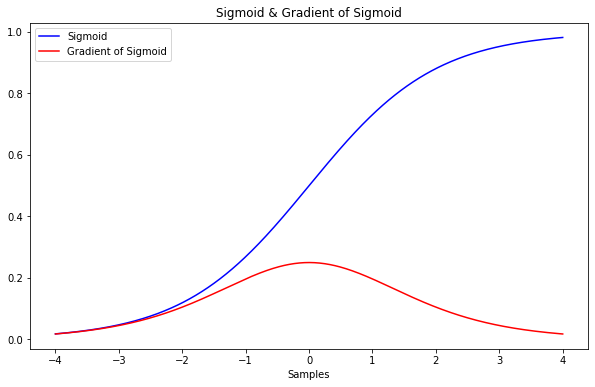

In [2]:
# Sigmoid Function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Gradient of Sigmoid Function
def gradientSigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))



'''
Function to draw a plot of the sigmoid and the gradient of sigmoid
- z: gives the range of input values
- numPoints: number of input points between -z & +z
'''
def plot_sigmoid_grad_sigmoid(z, numPoints):

    numbers = np.linspace(-z, z, num=numPoints)

    # Two arrays to store the sigmoid and gradient of sigmoid function output 
    array_sigmoid, array_gradientSigmoid = [], []

    for i in range(len(numbers)):
        array_sigmoid.append(sigmoid(numbers[i]))
        array_gradientSigmoid.append(gradientSigmoid(numbers[i]))


    # Draw a plot for both the sigmoid and the gradient of sigmoid
    fig = plt.figure(figsize=(10, 6))
    plt.plot(numbers, array_sigmoid, "b-", label="Sigmoid")
    plt.plot(numbers, array_gradientSigmoid, "r-", label="Gradient of Sigmoid")

    plt.title("Sigmoid & Gradient of Sigmoid")
    plt.legend(loc=2)
    plt.xlabel("Samples")
    plt.show()
    
    
# Plot the sigmoid and gradient of sigmoid between -4 and 4
plot_sigmoid_grad_sigmoid(4, 500)

## Task 1: Observation


We observe that if our input is away from 0, the slope of the function decreases quite fast and as a result we get a tiny gradient, and consequently tiny weight update. 

In Deep ANN (with many hidden layers) those gradients get multiplied many times during backpropagation. Gradients after many multiplications become small and stop making any influence. Thus, it is a usual practice to initialize weight parameters around zero value. This is done to ensure that we get reasonable gradients (close to 1) to train the ANN.


### What should be the Range for the Initial Values of the Weight Parameters?

The following plot of the gradient of sigmoid shows that the gradient is larger between -1 to +1.

Thus, we will define a function that initializes the weight parameters with random numbers between -1 to +1.

In [3]:
# # Draw a plot for the gradient of sigmoid
# plt.figure(figsize=(10, 6))
# plt.plot(numbers, array_gradientSigmoid, "r-", label="Derivative of Sigmoid")

# plt.title("Gradient of Sigmoid")
# plt.legend(loc=2)
# plt.xlabel("Samples")
# plt.show()


## Task 2: Experiment with Various Random Functions for Initializing Weights

We experiment with five random functions.

The first function draws samples from a **uniform** distribution between 0 ~ 1.
The last four functions draw samples from a **standard normal** (0 mean & unit variance) distribution. However, we control the **variance** (to push samples close to 0).

- Function 1: Generate samples from a “continuous uniform” distribution between 0 ~ 1.
- Function 2: Generate samples from the “standard normal” distribution (0 mean and variance 1).
- Function 3: Generate samples from the “standard normal” distribution (samples are VERY VERY VERY close to 0).
- Function 4: Generate samples from the “standard normal” distribution (samples are VERY VERY close to 0).
- Function 5: Generate samples from the “standard normal” distribution (samples are VERY close to 0).


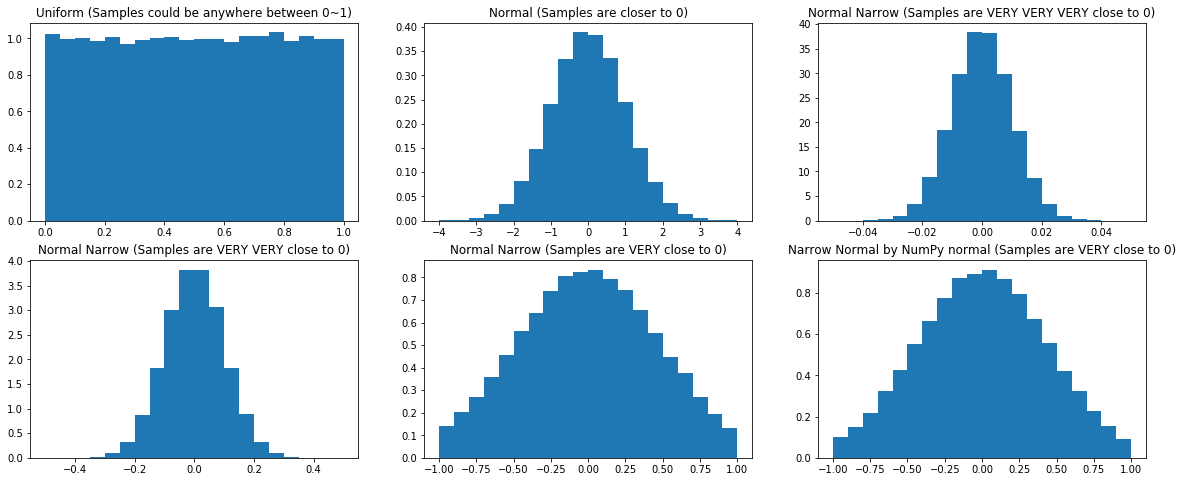

In [4]:
sample_size = 100000


# Function 1: Generate samples from a “continuous uniform” distribution between 0 ~ 1.
uniform = np.random.rand(sample_size)

# Function 2: Generate samples from the “standard normal” distribution (0 mean and variance 1).
normal = np.random.randn(sample_size)

# Function 3: Generate samples from the “standard normal” distribution (samples are VERY VERY VERY close to 0)
normal_narrow_1 = np.random.randn(sample_size)*0.01

# Function 4: Generate samples from the “standard normal” distribution (samples are VERY VERY close to 0)
normal_narrow_2 = np.random.randn(sample_size)*0.1

# Function 5: Generate samples from the “standard normal” distribution (samples are VERY close to 0)
normal_narrow_3 = np.random.randn(sample_size)*0.5

'''
We define a function using NumPy "normal" function by providing
- Mean
- Standard Deviation (square root of variance 'sigma')
'''
sigma = np.sqrt(1.0/5.0)

normal_rnd_normal = np.random.normal(0, sigma, sample_size)


# Plot the samples from the above 5 functions
plt.figure(figsize=(20, 8))
plt.subplot(231)
pdf, bins, patches = plt.hist(uniform, bins=20, range=(0, 1), density=True)
plt.title('Uniform (Samples could be anywhere between 0~1)')

plt.subplot(232)
pdf, bins, patches = plt.hist(normal, bins=20, range=(-4, 4), density=True)
plt.title('Normal (Samples are closer to 0)')

plt.subplot(233)
pdf, bins, patches = plt.hist(normal_narrow_1, bins=20, range=(-0.05, 0.05), density=True)
plt.title('Normal Narrow (Samples are VERY VERY VERY close to 0)')


plt.subplot(234)
pdf, bins, patches = plt.hist(normal_narrow_2, bins=20, range=(-0.5, 0.5), density=True)
plt.title('Normal Narrow (Samples are VERY VERY close to 0)')


plt.subplot(235)
pdf, bins, patches = plt.hist(normal_narrow_3, bins=20, range=(-1, 1), density=True)
plt.title('Normal Narrow (Samples are VERY close to 0)')

plt.subplot(236)
pdf, bins, patches = plt.hist(normal_rnd_normal, bins=20, range=(-1, 1), density=True)
plt.title('Narrow Normal by NumPy normal (Samples are VERY close to 0)')
plt.show()

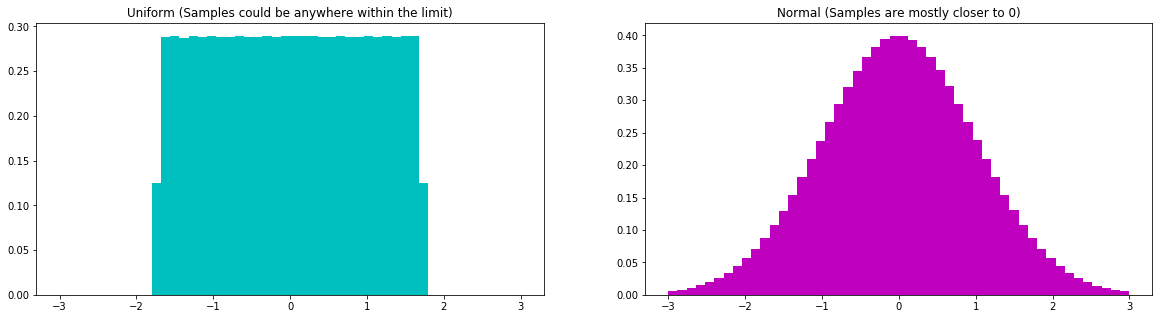

In [5]:
sample_size = 10000000


# Function 1: Generate samples from a “continuous uniform” distribution between 0 ~ 1.
#uniform = np.random.rand(sample_size)

limit = np.sqrt(3.0)

uniform = np.random.uniform(-limit, limit, sample_size)

# Function 2: Generate samples from the “standard normal” distribution (0 mean and variance 1).
normal = np.random.randn(sample_size)


'''
We define a function using NumPy "normal" function by providing
- Mean
- Standard Deviation (square root of variance 'sigma')
'''
sigma = 1.0

normal_rnd_normal = np.random.normal(0, sigma, sample_size)


# Plot the samples from the above 5 functions
plt.figure(figsize=(20, 5))
plt.subplot(121)
pdf, bins, patches = plt.hist(uniform, bins=50, range=(-3, 3), density=True, color='c')
plt.title('Uniform (Samples could be anywhere within the limit)')


plt.subplot(122)
pdf, bins, patches = plt.hist(normal_rnd_normal, bins=50, range=(-3, 3), density=True, color='m')
plt.title('Normal (Samples are mostly closer to 0)')
plt.show()

## Task 2: Observation

We observe that samples generated from the uniform distribution could be far away from 0. Thus, weight values initialized with uniform distribution could create very small gradient (weights that are far away from 0). Hence, it is unsuitable for weight initialization.


Among the four standard normal distributions, the last three seem better.

- 2nd Plot (Standard Normal): Variance is large. Thus, the range of values is too wide (far away from 0, though mostly centered around 0).

- 3rd Plot (Narrow Standard Normal): Variance is too small. Thus, the range of values is too narrow (very close 0, hence most of the weight values would be same).

Therefore, we need to choose the range of samples in between these two extremes (between the 2nd and 3rd plot).

The main idea here is to define the weight initializing function using a 0 mean normal distribution with a **static variance** smaller than 1. We controlled the variance in an ad-hoc manner. However, this can determined by considering the size of input, as well as output.


### Sophisticated Initialization Functions

Below we will see that better initialization functions can be defined by using **dynamic variance**. 

The variance of the weight initialization function would be controlled by the size of the **input and output layers**.

<img src="https://cse.unl.edu/~hasan/Pics/DNN-WeightInitialization.png" width=1000 height=600>


# Weight Initialization for Deep ANN

Previously we discussed the **slow convergence** issue in training DNNs using Stochastic Gradient Descent (SGD) optimization algorithm. In this note we discuss another issue of SGD (or any DNN optimization algorithm). This issue is known as **exploding and vanishing gradient** problem. This problem is caused by many layers of deep computational graphs

affets both feedforward DNN and Recurrent Neural Networks (RNNs). 


DNNs suffer from an ugly problem known as the **vanishing gradients** problem. In deep ANN, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layers' connection weights virtually unchanged, and training never converges to a good solution. 

In some cases, the opposite can happen: the gradients can grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges. This is the **exploding gradients** problem, which surfaces in recurrent neural networks. 

        More generally, deep ANNs suffer from **unstable gradients**: different layers may learn at widely different speeds.


<img src="http://engineering.unl.edu/images/uploads/DNN-WeightInitialization.png" width=1000 height=600>


Forward Propagation:

$z_j^{(k)} = \sum_{\substack{
   i \\
   layer (k-1)
  }} W_{ji}^{(k-1)} a_i^{(k-1)}$

$a_j^{(k)} = g(z_j^{(k)})$

Backward Propagation:

Output layer error/loss/cost: $\delta_j^{(k)} \equiv (a_j^{(K)} - y) g^{\prime}(z_j^{(k)})$

Hidden layer error/loss/cost: $\delta_j^{(k)} \equiv g^{\prime}(z_j^{(k)}) \sum_{\substack{
   j \\
   layer (k+1)
  }}  W_{ji}^{(k)} \delta_j^{(k+1)} $



Weight matrix update rule:



$W^{(k)} \leftarrow W^{(k)} - \eta \nabla_{W^{(k)}} L $

where the gradient of the loss function with respect to the weights of layer $k$ is:

$\nabla_{W^{(k)}} L  = \delta^{(k+1)} a^k$


For hidden layers: $ \nabla_{W^{(k)}} L = [g^{\prime}(z_j^{(k+1)}) \sum_{\substack{
   j \\
   layer (k+2)
  }}  W_{ji}^{(k+1)} \delta_j^{(k+2)}] a^k$



$z_j^{(2)} = \sum_{i=1}^{2}W_{ji}^{(1)}x_i$

$a_j^{(2)} = g(z_j^{(2)})$

$z_j^{(3)} = \sum_{i=1}^{2}W_{ji}^{(2)}a_i^{(2)}$

$a_j^{(3)} = g(z_j^{(3)})$


$z_j^{(K)} = \sum_{i=1}^{2}W_{ji}^{(K-1)}a_i^{(K-1)}$

$a_j^{(K)} = g(z_j^{(K)})$


$\hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}a_i^{(K)}$


$ \Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(z_j^{(K)})$

$ \Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(\sum_{i=1}^{2}W_{ji}^{(K-1)}a_i^{(K-1)})$


$\Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(\sum_{i=1}^{2}W_{ji}^{(K-1)}g(\sum_{i=1}^{2}W_{ji}^{(K-2)}a_i^{(K-2)}))$

$ \Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(\sum_{i=1}^{2}W_{ji}^{(K-1)}g(\sum_{i=1}^{2}W_{ji}^{(K-2)} g(\sum_{i=1}^{2}W_{ji}^{(K-3)}a_i^{(K-3)}))))$

$ \Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(\sum_{i=1}^{2}W_{ji}^{(K-1)}g(\sum_{i=1}^{2}W_{ji}^{(K-2)} g(\sum_{i=1}^{2}W_{ji}^{(K-3)}...g(\sum_{i=1}^{2}W_{ji}^{(2)}a_i^{(2)})   ...))))$

$\Rightarrow \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)}g(\sum_{i=1}^{2}W_{ji}^{(K-1)}g(\sum_{i=1}^{2}W_{ji}^{(K-2)} g(\sum_{i=1}^{2}W_{ji}^{(K-3)}...g(\sum_{i=1}^{2}W_{ji}^{(2)} g(\sum_{i=1}^{2}W_{ji}^{(1)}x_i))   ...))))$





Let's assume that the activation function is linear:

$g(z) = z$

Also the gradient of the activation function would be:

$g^{\prime}(z) = 1$

Thus, during forward propagation, the activation signals would be computed as follows. 


$a_j^{(k)} = \sum_{\substack{
   i \\
   layer (k-1)
  }} W_{ji}^{(k-1)} a_i^{(k-1)}$



The DNN output would be:
$ \hat{y} = \sum_{i=1}^{2}W_{ji}^{(K)} \sum_{i=1}^{2}W_{ji}^{(K-1)}\sum_{i=1}^{2}W_{ji}^{(K-2)} \sum_{i=1}^{2}W_{ji}^{(K-3)} ... \sum_{i=1}^{2}W_{ji}^{(2)} \sum_{i=1}^{2}W_{ji}^{(1)}x_i$


Let's consider a case in which the the weight matrices are diagonal and the weight values are greater than 1. Note that the weight matrix for the last $K$-th layer would not be $2 x 2$.

 $
  W^{(k)} =
  \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]
$

where $k = 1, 2, ..., (K-1)$

Then, 

$\hat{y} = \left[ {\begin{array}{c}
   W_1  \\
   W_2 \\
  \end{array} } \right]_{K}  \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(K-1)}  \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(K-2)} \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(K-3)} ... \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(3)} \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(2)} \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right]_{(1)} \left[ {\begin{array}{c}
   x_1  \\
   x_2 \\
  \end{array} } \right] $
  
  
$\Rightarrow \hat{y} = \left[ {\begin{array}{c}
   W_1  \\
   W_2 \\
  \end{array} } \right]_{K} \left[ {\begin{array}{cc}
   2 & 0 \\
   0 & 2 \\
  \end{array} } \right] ^ {(K-1)}\left[ {\begin{array}{c}
   x_1  \\
   x_2 \\
  \end{array} } \right] $
  
  
  
$\Rightarrow \hat{y} = \left[ {\begin{array}{c}
   W_1  \\
   W_2 \\
  \end{array} } \right]_{K} \left[ {\begin{array}{cc}
   2^{K-1} & 0 \\
   0 & 2^{K-1} \\
  \end{array} } \right]\left[ {\begin{array}{c}
   x_1  \\
   x_2 \\
  \end{array} } \right] $
  
  
  
In feedforward DNNs with very large K, the weights as well as the activation signals in each layer would grow exponentially. Then, during backpropagation, the exponentially large weights and activation signals would create very large gradients as it travels from the upper layers to the lower layers. This will create extremely large weight updates. 

$ \nabla_{W^{(k)}} L = [ \sum_{\substack{
j \\
layer (k+2)
}}  W_{ji}^{(k+1)} \delta_j^{(k+2)}] a^k$

The result is that the backpropagation algorithm would diverge. This is known as the **exploding gradients** problem. 

This is a more common phenomenon in **Recurrent Neural Networks** because we use the same weight matrix at each time step. However, in feedforward DNNs the weight matrix at each layer is different, thus  
  

Now let's see what happens if the the weights are smaller than 1.


$
  W^{(k)} =
  \left[ {\begin{array}{cc}
   0.5 & 0 \\
   0 & 0.5 \\
  \end{array} } \right]
$

where $k = 1, 2, ..., (K-1)$


$\hat{y} = \left[ {\begin{array}{c}
   W_1  \\
   W_2 \\
  \end{array} } \right]_{K} \left[ {\begin{array}{cc}
   0.5^{K-1} & 0 \\
   0 & 0.5^{K-1} \\
  \end{array} } \right]\left[ {\begin{array}{c}
   x_1  \\
   x_2 \\
  \end{array} } \right] $
  
  
We see that the weights as well as the activation signals in each layer would decrease exponentially. As a result during backward propagation of the signal, the loss gradients in each layer would decrease exponentially. This will cause the underflow problem as computers would round near-zero numbers to zero. The gradients would vanish! As a result weight update would nearly stop in the lower layers.

$W^{(k)} \leftarrow W^{(k)} - \eta \nabla_{W^{(k)}} L $

Thus, training **never converges** to a good solution. This is known as the **vanishing gradients** problem. 


The term vanishing gradient refers to the fact that in a feedforward ANN the back-propagated error signal typically decreases (or increases) exponentially as a function of the distance from the final layer. This problem is also observed in RNNs, where the errors are back-propagated in time and the error signal decreases (or increases) exponentially as a function of the distance back in time from the current error. Because of the vanishing gradient, adding many extra layers in feedforward ANN or time points in RNNs does not usually improve performance.

Essentially, the vanishing gradients problem causes the backpropagation algorithm to move very slowly through the cost space. Using metaphor, we could say that learning is stalled by **plateaus**. 


In general, the main problem in training DNNs is that different layers may learn at widely different speeds. How do we stabilize the gradients?

Before we discuss that let's consider a realistic scenario in which a logistic sigmoid function is used. 



#### What happens if we use logistic sigmoid function?

$a_j = g(z_j)$
$ \Rightarrow a_j = \frac{1}{1 + e^{z_j}}$

The logistic sigmoid function saturates to:
- 0: for large negative $z_j$
- 1: for large positive $z_j$

For large negative/positive $z_j$ the gradient of the sigmoid function $g^{\prime}(z_j)$ is close to 0.

During forward propagation, as the activation signal travels towards the upper layers, it gets saturated. Notice that the mean of the saturation is 0.5, which means that essentially half of the neurons in the upper layers are dead. These dead neurons effectively play no role in gradient update. Moreover, what makes it worse is during the backward propagation, the cost gradients at upper layers become nearly zero (because they are either saturated to 0 or 1).


For hidden layers: $ \nabla_{W^{(k)}} L = [g^{\prime}(z_j^{(k+1)}) \sum_{\substack{
   j \\
   layer (k+2)
  }}  W_{ji}^{(k+1)} \delta_j^{(k+2)}] a^k$


As a result weight update would nearly stop in the upper layers.

$W^{(k)} \leftarrow W^{(k)} - \eta \nabla_{W^{(k)}} L $

Thus, training never converges to a good solution. There are to root causes of this slow convergence problem.

- The sigmoid logistic activation function

- Random initialization of the weights


Let's discuss about sigmoid function first and why it pushes training in upper layers towards cost space plateaus.

The problem with sigmoid non-linearity is its none-zero mean that induces important singular values in the Hessian.

Glorot and Bengio observed the impact of sigmoid activation function (with random weight initialization). The created an ANN with 4 hidden layers, each layer with 1000 neurons. They trained the ANN using Shapeset-3 × 2 dataset. This dataset contains images of 1 or 2 two-dimensional objects, each taken from 3 shape categories (triangle, parallelogram, ellipse), and placed with random shape parameters (relative lengths and/or angles), scaling, rotation, translation and grey-scale.

They looked at the means and standard deviations (vertical bars) of the activations of each layer during training using a fixed set of 300 examples.


<img src="http://engineering.unl.edu/images/uploads/DNN-ActivationValuePerLayer.png" width=600 height=400>

They observed that the top hidden layer quickly saturated at 0, which essentially slowed down all learning. They also observed desaturation after 100 epochs. Thus, the saturation can last very long, preventing gradients to flow backward towards lower layers.

They hypothesized that this slow convergence is due to the combination of random initialization and saturated sigmoid. 

There are two ways to resolve this issue.
- Keep sigmoid, but replace random initialization 
- Replace sigmoid, but keep random initialization

Bengio (2009) showed that DNNs with sigmoids but initialized from unsupervised pre-training (e.g. from Restricted Boltzmann Machines or RBMs) do not suffer from this saturation behavior. The reason is the transformation that the lower layers of the randomly initialized network computes initially is not useful to the classification task, unlike the transformation obtained from unsupervised pre-training.

The unsupervised learning could help reduce the dependency on the unreliable update direction given by the gradient with respect to a supervised criterion. In addition to this, using unsupervised learning at each level of a deep architecture we could naturally decompose the problem into sub-problems associated with different levels of abstraction. The unsupervised learning algorithms can extract salient information about the input distribution. This information can be captured in a distributed representation, i.e., a set of features which encode the salient factors of variation in the input. A one-layer unsupervised learning algorithm could extract such salient features, but because of the limited capacity of that layer, the features extracted on the first level of the architecture can be seen as low-level features. It is conceivable that learning a second layer based on the same principle but taking as input the features learned with the first layer could extract slightly higher-level features. In this way, one could imagine that higher-level abstractions that characterize the input could emerge. Note how in this process all learning could remain local to each layer, therefore side-stepping the issue of gradient diffusion that might be hurting gradient-based learning of deep neural networks, when we try to optimize a single global criterion. 

https://mila.quebec/wp-content/uploads/2019/08/TR1312.pdf


Another approach is to replace sigmoid with a symmetric activation function (output ranges from -1 to +1) which has a mean 0 (unlike signoid which has a mean 0.5). For example, a hyperbolic tangent function can be used as it generates activations that sit around 0, which allows gradients to flow backwards. It ensures that half of the upper layer neurons are not dead, unlike sigmoid function. But the problem is, similar to the sigmoid, gradient of the hyperbolic tangent at the staturation is zero.Thus, it prevent gradients to flow backward and prevent the lower layers from learning useful features. Eventually but slowly, the lower layers move toward more useful features and the top hidden layer then moves out of the saturation regime. Note however that, even after this, the network moves into a solution that is of poorer quality.

Thus, it looks like that we need to replace both the activation function and the  weight initialization technique.

The activation function should vary across the range of the input, unlike sigmoid/tanh that saturates at higher/lower end. A good choice is the ReLU activation function, or a variant of it, such as leaky ReLU, ELU, etc.

For this note it is suffice to use ReLU so that we can focus on the weight initialization techique.

To determine a good initialization technique, we need to understand the what causes saturation at the upper layers.




### Why does the saturation occur at the upper layers.?

Glorot and Bengio (2010) showed that due to the random initialization scheme (along with sigmoid/tanh), the variance of the outputs of each layer is much greater than the variance of its inputs. Going forward in the network, the variance keeps increasing after each layer until the activation function saturates at the top layers. 


##### -----

In general, in DNNs different layers may learn at widely different speeds resulting into unstable gradients. Unfortunately due to this problem it was nor possible to train very deep ANNs in the early 2000s. The problem was solved in 2010 when Xavier Glorot and Yoshua Bengio showed that the unstable gradients problem might be caused by the combination of two factors: 
- The logistic sigmoid function
- The weight initialization technique that was based on a normal distribution with a mean of 0 and a standard deviation of 1. 

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

### Why does the combination of logistic sigmoid and weight initialiazation (o mean and std 1) caue unstable gradients?

The main problem is that the activation function gets saturated in deeper layers. This happens due to large difference between the variance of an input layer and its output layer, which gets bigger. As the variance increases towards the deeper layers, it causes the saturation of the activation function.

Also notice that logistic sigmoid function has a mean 0.5, which further exacerbates the saturation problem. Because when inputs become large (negative or positive), the sigmoid function saturates at 0 or 1, As a result its derivative becomes very close to 0, which consequently causes the gradients to be smaller in the upper layers. Due to these smaller gradients in the upper layers learning (weight update) would stop in the lower layers.



There are two standard weight initialization techniques (for two types of activation functions) for alleviating the unstable gradient problem.
- Activation Function: logistic, tanh, softmax
- Activation: ReLU


### Activation Function: logistic, tanh, softmax

**Xavier initialization or Glorot initialization**: Glorot and Bengio propose a way to significantly alleviate the unstable gradients problem.

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

They point out that we need the signal to flow properly in both directions: in the forward direction when making predictions, and in the reverse direction when backpropagating gradients. We don’t want the signal to die out, nor do we want it to explode and saturate. For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs, and we need the **gradients to have equal variance** before and after flowing through a layer in the reverse direction. 

To explain this phenomenon, Geron used an analogy:

If you set a microphone amplifier’s knob too close to zero, people won’t hear your voice, but if you set it too close to the max, your voice will be saturated and people won’t understand what you are saying. Now imagine a chain of such amplifiers: they all need to be set properly in order for your voice to come out loud and clear at the end of the chain. Your voice has to come out of each amplifier **at the same amplitude** as it came in.


It is actually not possible to guarantee that the **gradients to have equal variance** before and after flowing through a layer in the reverse direction unless the layer has an equal number of inputs and neurons (these numbers are called the fan-in and fan-out of the layer).

Glorot and Bengio proposed a good compromise that has proven to work very well in practice: the connection weights of each layer must be initialized randomly as described below, where $fan_{avg} = (fan_{in} + fan_{out})/2$. 


- Normal distribution with mean 0 and variance $\sigma^2 = \frac{1}{fan_{avg}}$

Python Functions:
1. $W = np.random.randn(fan_{in},fan_{out})*np.sqrt(\frac{1}{fan_{avg}})$
2. $W = np.random.normal(0, np.sqrt(\frac{1}{fan_{avg}}), (fan_{in}, fan_{out}))$


- Uniform distribution between -r and +r, with $r = \sqrt(\frac{3}{fan_{avg}})$





### Activation Function: ReLU

**He initialization**: The He initialization strategy for the ReLU activation function (and its variants, including the ELU activation) initializes the weights by keeping in mind the size of the **previous layer ($fan_{in}$)**. 

It helps in attaining a global minimum of the loss function faster and more efficiently. The weights are still random but differ in range depending on the size of the previous layer of neurons. This provides a controlled initialization hence the faster and more efficient gradient descent.

https://arxiv.org/abs/1502.01852

- Normal distribution with mean 0 and variance $\sigma^2 = \frac{2}{fan_{in}}$

Python Function:
1. $W = np.random.randn(fan_{in},fan_{out})*np.sqrt(\frac{2}{fan_{in}})$
2. $W = np.random.normal(0, np.sqrt(\frac{2}{fan_{in}}), (fan_{in}, fan_{out}))$

       
















In [3]:
import numpy as np

mean, std = 0.0, 0.0
for i in range(10):
    a = np.random.randn(784)
    W = np.random.randn(784, 300)
    z = np.matmul(a, W)
    
    mean += np.mean(z)
    std += np.std(z)

print(mean/10)
print(std/10)    

-0.6668778910083646
27.574706502756918


In [7]:
print(np.sqrt(784))

28.0



The main problem with random initialization technique is that it increases the variance of the input signal.

To illustrate this, tet's use the example of MNIST handwritten digit recognition problem. Each grayscale image is represented by $28 x 28$ pixels. After flattening this, the dimension of the input would be 784. We scale down the pixel values between 0 and 1.

To mimick the MNIST example, we create a 784-dimensional synthetic input vector $\vec{a}$ by sampling from a normal distribution with 0 mean and variance 1.

Using the following NumPy code we confirm that the input variance is indeed approximately equal to 1.


Let's create a $784 x 300$ dimensional weight matrix $W$. Thus, the number of neurons in the input layer is 784, and in the output layer is 300.

The output signal would be computed by taking sum of the product of each dimension of input signals with the weight matrix: $\vec{z} = \vec{a} W$

Now let's ask: what would be the variance of the output signal? Would it be 1, similar to the variance of the input?

The answer is no!

We can show that the variance of the output signal would be approximately equal to the number of neurons in the input layer, i.e., 784. Equivalently, the standard deviation of the output signal would be approximately equal to $\sqrt(784)$. Using NumPy we demonstrate this below.


Why is the variance of the output is approximately equal to the number of input layer neurons?

Because to create the output signal $\vec{z}$, we computed the sum of 784 products of each dimension of the randomly assigned input $\vec{a}$ with the randomly assigned neurons of each column of $W$. Each of these 784 products individually would have a mean of 0 and variance of 1. Thus, after taking the sum of 784 products, the variance of the output signal $\vec{z}$ would be 784 and its standard deviation would be $\sqrt(784) = 28$.

Now we understand why the deceivingly simple random initialization technique would increase the variance of the output signals as the signals propagate toward the upper layers. 

In [8]:
mean_output, var_output, std_output = 0.0, 0.0, 0.0

for i in range(10000):
    
    a = np.random.randn(784) # Input signal
    
    W = np.random.randn(784, 300) # Weight matrix
    
    z = np.matmul(a, W) # Output signal
    
    mean_output += np.mean(z)
    var_output += np.var(z)
    std_output += np.std(z)

print(mean_output/10000)
print(var_output/10000)  
print(std_output/10000)   

-0.022537661245908246
779.8842670989438
27.893861699614046


In [9]:
mean_input, var_input, std_input = 0.0, 0.0, 0.0

for i in range(1000):
    a = np.random.randn(784) # Input signal
    
    mean_input += np.mean(a)
    var_input += np.var(a)
    std_input += np.std(a)

print(mean_input/1000)
print(var_input/1000)  
print(std_input/1000) 

-0.00044561591974864173
0.9974666169912496
0.9984200699847557


In [10]:
a = np.array([2, 4, 6, 8])
print(a)

b = np.array([[3, 3], [4, 4], [5, 5], [6, 6]])
print(b)

c = np.matmul(a, b)
print(c)

d = a.dot(b)
print(d)

[2 4 6 8]
[[3 3]
 [4 4]
 [5 5]
 [6 6]]
[100 100]
[100 100]


In [11]:
import numpy as np

s = np.random.uniform(5,9,10)

print(s)

[8.23150585 8.26916017 7.18564336 7.56133609 6.38083081 6.59656107
 5.76974257 5.37969131 7.06289678 5.03101604]


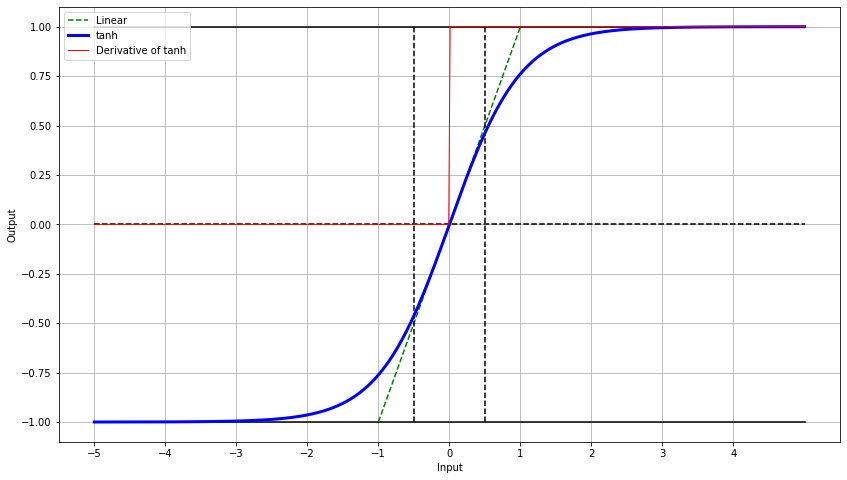

In [6]:
# Sigmoid Function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Gradient of Sigmoid Function
def gradientSigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))


def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    

def gradientTanh(z):
    y = tanh(z)
    dy=1-y**2
    return dy



def relu(z):
    return max(0.0, z)

def gradientRelu(z):
    return np.greater(z, 0).astype(int)



def leaky_relu(z, alpha=0.05):
    return np.maximum(alpha*z, z)


def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)


'''
Function to draw a plot of the activation function and its gradient 
- z: gives the range of input values
- numPoints: number of input points between -z & +z
'''
def plot_activation_grad_activation(z, numPoints, activation, gradActivation, funcName, displayGradient=True):

    numbers = np.linspace(-z, z, num=numPoints)

    # Two arrays to store the sigmoid and gradient of sigmoid function output 
    array_activation, array_gradientActivation = [], []

    for i in range(len(numbers)):
        array_activation.append(activation(numbers[i]))
        array_gradientActivation.append(gradActivation(numbers[i]))


    # Draw a plot for both the sigmoid and the gradient of sigmoid
    fig = plt.figure(figsize=(14, 8))
    
    
    if(activation == sigmoid):
        plt.plot([-z, z], [0, 0], 'k-') # Sigmoid
        plt.plot([-z, z], [1, 1], 'k-') # Sigmoid
        plt.plot([-z, z], [0.5, 0.5], 'k--') # Sigmoid
        plt.plot([-2, 2], [0, 1], 'g--', label="Linear") # Sigmoid
        plt.plot([-1, -1], [0, 1], 'k--') # Sigmoid
        plt.plot([1, 1], [0, 1], 'k--') # Sigmoid

    
    if(activation == tanh):
        plt.plot([-z, z], [-1, -1], 'k-') # Tanh
        plt.plot([-z, z], [1, 1], 'k-') # Tanh
        plt.plot([-z, z], [0, 0], 'k--') # Tanh
        plt.plot([-1, 1], [-1, 1], 'g--', label="Linear") # Tanh
        plt.plot([-0.5, -0.5], [-1, 1], 'k--') # Tanh
        plt.plot([0.5, 0.5], [-1, 1], 'k--') # Tanh
        
        
    if(activation == elu or activation == leaky_relu):
        plt.plot([-5, 5], [0, 0], 'k--') # elu
    
    
    
    plt.plot(numbers, array_activation, "b-", label=funcName, linewidth=3)
    
    if(displayGradient == True):
        plt.plot(numbers, array_gradientActivation, "r-", label="Derivative of "+funcName, linewidth=1)

    #plt.title("Activation Function and Gradient")
    plt.legend(loc=0)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.xticks(range(-z, z))
    plt.show()
    
    
# Plot the sigmoid and gradient of sigmoid between -5 and 5
#plot_activation_grad_activation(5, 500, leaky_relu, gradientRelu, "Leaky ReLU", False)
plot_activation_grad_activation(5, 500, tanh, gradientRelu, "tanh", True)

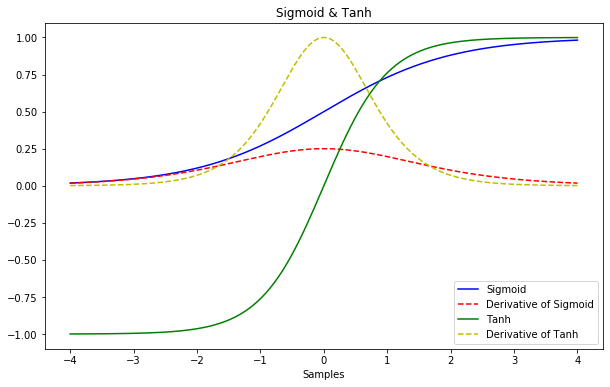

In [13]:
# Sigmoid Function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Gradient of Sigmoid Function
def gradientSigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))


def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    

def gradientTanh(z):
    y = tanh(z)
    dy=1-y**2
    return dy



def plot_sigmoid_grad_sigmoid(z, numPoints):

    numbers = np.linspace(-z, z, num=numPoints)

    # Two arrays to store the sigmoid and gradient of sigmoid function output 
    array_sigmoid, array_gradientSigmoid = [], []
    array_tanh, array_gradientTanh = [], []

    for i in range(len(numbers)):
        array_sigmoid.append(sigmoid(numbers[i]))
        array_gradientSigmoid.append(gradientSigmoid(numbers[i]))
        array_tanh.append(tanh(numbers[i]))
        array_gradientTanh.append(gradientTanh(numbers[i]))


    # Draw a plot for both the sigmoid and the gradient of sigmoid
    fig = plt.figure(figsize=(10, 6))
    plt.plot(numbers, array_sigmoid, "b-", label="Sigmoid")
    plt.plot(numbers, array_gradientSigmoid, "r--", label="Derivative of Sigmoid")
    plt.plot(numbers, array_tanh, "g-", label="Tanh")
    plt.plot(numbers, array_gradientTanh, "y--", label="Derivative of Tanh")

    plt.title("Sigmoid & Tanh")
    plt.legend(loc=4)
    plt.xlabel("Samples")
    plt.show()
    
    
# Plot the sigmoid and gradient of sigmoid between -4 and 4
plot_sigmoid_grad_sigmoid(4, 500)

In [7]:
sigma = np.sqrt(1.0/5.0)

normal_rnd_normal = np.random.normal(0, sigma, sample_size)



# Draw a plot for the gradient of sigmoid
plt.figure(figsize=(10, 6))
plt.plot(numbers, array_gradientSigmoid, "r-", label="Derivative of Sigmoid")

plt.title("Gradient of Sigmoid")
plt.legend(loc=2)
plt.xlabel("Samples")
plt.show()

NameError: name 'sample_size' is not defined

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

lower, upper = -0.7, 0.7
mu = 0
sigma = np.sqrt(1.0/5.0)

X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)

# Plot the samples from the above 5 functions
plt.figure(figsize=(16, 8))

plt.hist(N.rvs(1000000), bins=30, density=True, color="m", label="Normal")
plt.hist(X.rvs(1000000), bins=30, density=True, color="c", label="Truncated Normal")
plt.legend(loc=0)
plt.show()

In [ ]:
# The input to the activation function of the node in this case is simply x1w1.  
# What does changing w1 do in this simple network?

# Here we can see that changing the weight changes the slope of the output of the sigmoid activation function, 
# which is obviously useful if we want to model different strengths of relationships between 
# the input and output variables.  



x = np.linspace(-5, 5, 5000)
#x = np.arange(-10, 10, 0.1)


w1 = 0.5
w2 = 1.0
w3 = 20.0
l1 = '$w_1$ = 0.5'
l2 = '$w_1$ = 1.0'
l3 = '$w_1$ = 20.0'

plt.figure(figsize=(10, 6))
for w, l, c in [(w1, l1, "r"), (w2, l2, "b"), (w3, l3, "g")]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l, color=c)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.legend(loc=2)
plt.show()



# However, what if we only want the output to change 
# when x is greater than 1?  
# This is where the bias comes in – let’s consider the same network with a bias input:


w = 3.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = '$w_0$ = -8.0'
l2 = '$w_0$ = 0.0'
l3 = '$w_0$ = 8.0'

plt.figure(figsize=(10, 6))
for b, l, c in [(b1, l1, "r"), (b2, l2, "b"), (b3, l3, "g")]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l, color=c)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.legend(loc=2)
plt.show()


# In this case, the w1 has been increased to simulate a more defined “turn on” function.  
# As you can see, by varying the bias “weight” b, you can change when the node activates.  
# Therefore, by adding a bias term, you can make the node simulate a generic if function, 
# i.e. if (x > z) then 1 else 0.  Without a bias term, you are unable to vary the z in that if statement, 
# it will be always stuck around 0.  
# This is obviously very useful if you are trying to simulate conditional relationships.



In [ ]:
def logistic(x,offset):
    # X is an array of numbers at which to evaluate the logistc unit, offset is the offset value
    return (1/(1 + np.exp(-x+offset)))



x = np.linspace(-10,10,200)
y = logistic(x,0)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()


N_sum = 100      # Number of logistics to sum
offsets = np.linspace(0,np.max(x),100)
y_sum = np.zeros(len(x))
for offset in offsets:
    y_sum += logistic(x,offset)

y_sum = y_sum / N_sum

relu_approx = np.log(1 + np.exp(x))

plt.figure(figsize=(10, 6))
plt.plot(x, y_sum)
plt.plot(x, relu_approx)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()